# Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Dropout, Input, Flatten, Concatenate, Add

In [3]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc

In [39]:
from tensorflow.keras.optimizers import Adam

## Final Data Prepare

In [4]:
same_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/same_final.csv')
int_df = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_final.csv')

In [5]:
same_df['Date'] = pd.to_datetime(same_df['Date'])
int_df['Date'] = pd.to_datetime(int_df['Date'])

In [6]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_df[boolean_columns] = same_df[boolean_columns].astype(bool)
int_df[boolean_columns] = int_df[boolean_columns].astype(bool)

# Set Index
same_df.set_index('Date', inplace = True)
int_df.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same = same_df[features][:3519].values
y_train_same = same_df[target][:3519].values

x_val_same = same_df[features][3519:4692].values
y_val_same = same_df[target][3519:4692].values

x_test_same = same_df[features][4692:].values
y_test_same = same_df[target][4692:].values

x_scaler_same_df, y_scaler_same_df = MinMaxScaler(), MinMaxScaler()

x_train_same = x_scaler_same_df.fit_transform(x_train_same)
y_train_same = y_scaler_same_df.fit_transform(y_train_same.reshape(-1, 1))

x_val_same = x_scaler_same_df.transform(x_val_same)
y_val_same = y_scaler_same_df.transform(y_val_same.reshape(-1, 1))

x_test_same = x_scaler_same_df.transform(x_test_same)
y_test_same = y_scaler_same_df.transform(y_test_same.reshape(-1, 1))

In [7]:
x_train_int = int_df[features][:3519].values
y_train_int = int_df[target][:3519].values

x_val_int = int_df[features][3519:4692].values
y_val_int = int_df[target][3519:4692].values

x_test_int = int_df[features][4692:].values
y_test_int = int_df[target][4692:].values

x_scaler_int_df, y_scaler_int_df = MinMaxScaler(), MinMaxScaler()

x_train_int = x_scaler_int_df.fit_transform(x_train_int)
y_train_int = y_scaler_int_df.fit_transform(y_train_int.reshape(-1, 1))

x_val_int = x_scaler_int_df.transform(x_val_int)
y_val_int = y_scaler_int_df.transform(y_val_int.reshape(-1, 1))

x_test_int = x_scaler_int_df.transform(x_test_int)
y_test_int = y_scaler_int_df.transform(y_test_int.reshape(-1, 1))

### Feature Selection

In [8]:
features0_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'US_10',  'WTI', 'Exchange',
      'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

features0_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1']

In [9]:
len(features0_int)

13

In [10]:
selected_x_train_same = same_df[features0_same][:3519].values
selected_y_train_same = same_df[target][:3519].values

selected_x_val_same = same_df[features0_same][3519:4692].values
selected_y_val_same = same_df[target][3519:4692].values

selected_x_test_same = same_df[features0_same][4692:].values
selected_y_test_same = same_df[target][4692:].values

x_scaler_selected_same_df, y_scaler_selected_same_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_same = x_scaler_selected_same_df.fit_transform(selected_x_train_same)
selected_y_train_same = y_scaler_selected_same_df.fit_transform(selected_y_train_same.reshape(-1, 1))

selected_x_val_same = x_scaler_selected_same_df.transform(selected_x_val_same)
selected_y_val_same = y_scaler_selected_same_df.transform(selected_y_val_same.reshape(-1, 1))

selected_x_test_same = x_scaler_selected_same_df.transform(selected_x_test_same)
selected_y_test_same = y_scaler_selected_same_df.transform(selected_y_test_same.reshape(-1, 1))

In [123]:
selected_x_train_int = int_df[features0_int][:3519].values
selected_y_train_int = int_df[target][:3519].values

selected_x_val_int = int_df[features0_int][3519:4692].values
selected_y_val_int = int_df[target][3519:4692].values

selected_x_test_int = int_df[features0_int][4692:].values
selected_y_test_int = int_df[target][4692:].values

x_scaler_selected_int_df, y_scaler_selected_int_df = MinMaxScaler(), MinMaxScaler()

selected_x_train_int = x_scaler_selected_int_df.fit_transform(selected_x_train_int)
selected_y_train_int = y_scaler_selected_int_df.fit_transform(selected_y_train_int.reshape(-1, 1))

selected_x_val_int = x_scaler_selected_int_df.transform(selected_x_val_int)
selected_y_val_int = y_scaler_selected_int_df.transform(selected_y_val_int.reshape(-1, 1))

selected_x_test_int = x_scaler_selected_int_df.transform(selected_x_test_int)
selected_y_test_int = y_scaler_selected_int_df.transform(selected_y_test_int.reshape(-1, 1))

In [12]:
selected_y_train_int.shape

(3519, 1)

In [13]:
selected_y_val_int.shape

(1173, 1)

In [14]:
selected_y_test_int.shape

(1173, 1)

In [15]:
print(x_scaler_selected_int_df.n_features_in_)

13


## Without Outlier Process Data Prepare

In [16]:
same_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/same_no_outlier.csv')
int_wo = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_no_outlier.csv')

In [17]:
boolean_columns = [
    "Covid19",
    "US_President_Republican",
    "US_President_Democratic",
    "KR_President_Democratic",
    "KR_President_Conservative",
    "KR_President_Neutral"
]

same_wo[boolean_columns] = same_wo[boolean_columns].astype(bool)
int_wo[boolean_columns] = int_wo[boolean_columns].astype(bool)

# Set Index
same_wo.set_index('Date', inplace = True)
int_wo.set_index('Date', inplace = True)

# Normalization
features = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','SE_Operating_Profit', 'SE_Net_Profit', 'SE_Total_Equity',
       'SE_Total_Liabilities', 'SE_Revenue', 'SE_Foreign', 'US_Inflation', 'KR_Inflation', 'CN_Inflation', 'US_GDP_Annual', 'KR_GDP_Annual',
       'CN_GDP_Annual', 'US_Economic_Growth_Rate', 'KR_Economic_Growth_Rate', 'US_Base', 'US_10', 'KR_Base', 'KR_10', 'WTI', 'Exchange', 'SOX_Close',
       'Phone', 'KR_Unemployment', 'Covid19', 'US_President_Republican', 'US_President_Democratic', 'KR_President_Democratic', 'KR_President_Conservative', 'KR_President_Neutral',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']
target = ['Close']

x_train_same_wo = same_wo[features][:3519].values
y_train_same_wo = same_wo[target][:3519].values

x_val_same_wo = same_wo[features][3519:4692].values
y_val_same_wo = same_wo[target][3519:4692].values

x_test_same_wo = same_wo[features][4692:].values
y_test_same_wo = same_wo[target][4692:].values

x_scaler_same_wo, y_scaler_same_wo = MinMaxScaler(), MinMaxScaler()

x_train_same_wo = x_scaler_same_wo.fit_transform(x_train_same_wo)
y_train_same_wo = y_scaler_same_wo.fit_transform(y_train_same_wo.reshape(-1, 1))

x_val_same_wo = x_scaler_same_wo.transform(x_val_same_wo)
y_val_same_wo = y_scaler_same_wo.transform(y_val_same_wo.reshape(-1, 1))

x_test_same_wo = x_scaler_same_wo.transform(x_test_same_wo)
y_test_same_wo = y_scaler_same_wo.transform(y_test_same_wo.reshape(-1, 1))

In [18]:
x_train_int_wo = int_wo[features][:3519].values
y_train_int_wo = int_wo[target][:3519].values

x_val_int_wo = int_wo[features][3519:4692].values
y_val_int_wo = int_wo[target][3519:4692].values

x_test_int_wo = int_wo[features][4692:].values
y_test_int_wo = int_wo[target][4692:].values

x_scaler_int_wo, y_scaler_int_wo = MinMaxScaler(), MinMaxScaler()

x_train_int_wo = x_scaler_int_wo.fit_transform(x_train_int_wo)
y_train_int_wo = y_scaler_int_wo.fit_transform(y_train_int_wo.reshape(-1, 1))

x_val_int_wo = x_scaler_int_wo.transform(x_val_int_wo)
y_val_int_wo = y_scaler_int_wo.transform(y_val_int_wo.reshape(-1, 1))

x_test_int_wo = x_scaler_int_wo.transform(x_test_int_wo)
y_test_int_wo = y_scaler_int_wo.transform(y_test_int_wo.reshape(-1, 1))

### Feature Selection

In [19]:
features2_same = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30']

features2_int = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction', 'WTI', 'SOX_Close',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_60', 'Lag_90']

In [20]:
selected_x_train_same_wo = same_wo[features2_same][:3519].values
selected_y_train_same_wo = same_wo[target][:3519].values

selected_x_val_same_wo = same_wo[features2_same][3519:4692].values
selected_y_val_same_wo = same_wo[target][3519:4692].values

selected_x_test_same_wo = same_wo[features2_same][4692:].values
selected_y_test_same_wo = same_wo[target][4692:].values

x_scaler_selected_same_wo, y_scaler_selected_same_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_same_wo = x_scaler_selected_same_wo.fit_transform(selected_x_train_same_wo)
selected_y_train_same_wo = y_scaler_selected_same_wo.fit_transform(selected_y_train_same_wo.reshape(-1, 1))

selected_x_val_same_wo = x_scaler_selected_same_wo.transform(selected_x_val_same_wo)
selected_y_val_same_wo = y_scaler_selected_same_wo.transform(selected_y_val_same_wo.reshape(-1, 1))

selected_x_test_same_wo = x_scaler_selected_same_wo.transform(selected_x_test_same_wo)
selected_y_test_same_wo = y_scaler_selected_same_wo.transform(selected_y_test_same_wo.reshape(-1, 1))

In [21]:
selected_x_train_int_wo = int_wo[features2_int][:3519].values
selected_y_train_int_wo = int_wo[target][:3519].values

selected_x_val_int_wo = int_wo[features2_int][3519:4692].values
selected_y_val_int_wo = int_wo[target][3519:4692].values

selected_x_test_int_wo = int_wo[features2_int][4692:].values
selected_y_test_int_wo = int_wo[target][4692:].values

x_scaler_selected_int_wo, y_scaler_selected_int_wo = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_wo = x_scaler_selected_int_wo.fit_transform(selected_x_train_int_wo)
selected_y_train_int_wo = y_scaler_selected_int_wo.fit_transform(selected_y_train_int_wo.reshape(-1, 1))

selected_x_val_int_wo = x_scaler_selected_int_wo.transform(selected_x_val_int_wo)
selected_y_val_int_wo = y_scaler_selected_int_wo.transform(selected_y_val_int_wo.reshape(-1, 1))

selected_x_test_int_wo = x_scaler_selected_int_wo.transform(selected_x_test_int_wo)
selected_y_test_int_wo = y_scaler_selected_int_wo.transform(selected_y_test_int_wo.reshape(-1, 1))

# Model Setting

In [22]:
!pip install wandb -qU

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 74.9 MB/s eta 0:00:00


In [23]:
!pip install tensorflow

In [24]:
import wandb
from wandb.integration.keras import WandbCallback

In [25]:
wandb.login(key='b0f579d1228ea5f3cfac162435df78243cadca62')

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: yebin. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [26]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is set to be used.")
    except RuntimeError as e:
        print(f"Error setting GPU memory growth: {e}")
else:
    print("No GPU found. Using CPU instead.")

No GPU found. Using CPU instead.


In [27]:
def create_sequences(X, y, time_steps):
    sequences, labels = [], []
    for i in range(len(X) - time_steps):
        sequences.append(X[i:i+time_steps])
        labels.append(y[i+time_steps])
    return np.array(sequences), np.array(labels)

def rmse_metric(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

In [28]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name='attention_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='attention_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.V = self.add_weight(name='attention_score', shape=(input_shape[-1], 1),
                                 initializer='random_normal', trainable=True)

    def call(self, inputs):
        # Attention mechanism
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector

In [29]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, key_dim):
        super(MultiHeadAttentionLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)

    def call(self, query, value):
        return self.attention(query=query, value=value, key=value)

In [30]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터할 지표 (예: 'val_loss' 또는 'val_rmse')
    patience=5,          # 성능 향상이 없는 epoch 수 (5번 동안 개선 없으면 중단)
    restore_best_weights=True,  # 가장 성능이 좋은 가중치를 복원
    mode = 'min'
    #verbose=1            # 로그 출력 여부
)

# LSTM - Interp

##### 20 - 놀랍게도 현재까지 베스트

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper20", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper20.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper20 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper20.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper20.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper20.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper20.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3341 - mse: 0.3341 - val_loss: 0.0210 - val_mse: 0.0210 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.9045e-04 - mse: 7.9045e-04 - val_loss: 0.0193 - val_mse: 0.0193 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 5.4366e-04 - mse: 5.4366e-04 - val_loss: 0.0168 - val_mse: 0.0168 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.0876e-04 - mse: 4.0876e-04 - val_loss: 0.0158 - val_mse: 0.0158 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.1181e-04 - mse: 3.1181e-04 - val_loss: 0.0149 - val_mse: 0.0149 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.7444e-04 - mse: 2.7444e-04 - val_loss: 0.0141 - val_mse: 0.0141 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.4335e-04 - mse: 3.4335e-04 - val_loss: 

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18            │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_12 (Conv1D)        │ (None, 88, 128)        │          5,120 │ input_layer_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_12          │ (None, 44, 128)        │              0 │ conv1d_12[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_46 (LSTM)            │ (None, 44, 128)        │        131,584 │ max_pooling1d_12[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 44, 128)        │              0 │ max_pooling1d_12[0][0… │
│                           │                        │                │ lstm_46[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_7 (Flatten)       │ (None, 5632)           │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_34 (Dense)          │ (None, 64)             │        360,512 │ flatten_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_47 (LSTM)            │ (None, 64)             │         49,408 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 64)             │              0 │ dense_34[0][0],        │
│                           │                        │                │ lstm_47[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_35 (Dense)          │ (None, 64)             │          4,160 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_36 (Dense)          │ (None, 1)              │             65 │ dense_35[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,652,549 (6.30 MB)

 Trainable params: 550,849 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,101,700 (4.20 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


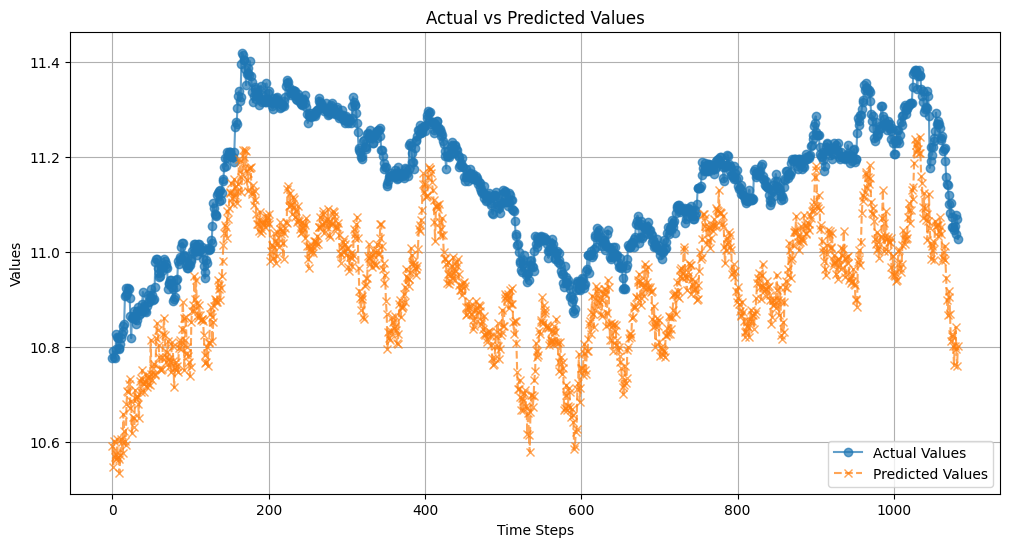

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper20.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 21

In [ ]:
wandb.finish()

In [ ]:
wandb.init(project="LSTM Final - Interp", name="hyper21", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper21.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# 모델
input_layer = Input(shape=(time_steps, len(features0_int)))

conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)


lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True, dropout=0.2)(pool1)
skip1 = Add()([pool1, lstm1])

lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh', dropout=0.2)(skip1)
skip1_flattened = Flatten()(skip1)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)
skip2 = Add()([skip1_reshaped, lstm2])

dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 컴파일
model_int_hyper21 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper21.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper21.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper21.optimizer.learning_rate.numpy(),
    })

model_int_hyper21.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.7592 - mse: 0.7592 - val_loss: 0.0101 - val_mse: 0.0101 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0095 - val_mse: 0.0095 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0107 - val_mse: 0.0107 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 8.2412e-04 - mse: 8.2412e-04 - val_loss: 0.0090 - val_mse: 0.0090 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.3871e-04 - mse: 6.3871e-04 - val_loss: 0.0089 - val_mse: 0.0089 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.0262e-04 - mse: 5.0262e-04 - val_loss: 0.0108 - val_mse: 0.0108 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.1779e-04 - mse: 6.1779e-04 - val_loss: 0.0087 - val_mse

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_13 (Conv1D)        │ (None, 88, 128)        │          5,120 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_13          │ (None, 44, 128)        │              0 │ conv1d_13[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_48 (LSTM)            │ (None, 44, 128)        │        131,584 │ max_pooling1d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 44, 128)        │              0 │ max_pooling1d_13[0][0… │
│                           │                        │                │ lstm_48[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_8 (Flatten)       │ (None, 5632)           │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_37 (Dense)          │ (None, 64)             │        360,512 │ flatten_8[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_49 (LSTM)            │ (None, 64)             │         49,408 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 64)             │              0 │ dense_37[0][0],        │
│                           │                        │                │ lstm_49[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_38 (Dense)          │ (None, 64)             │          4,160 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_39 (Dense)          │ (None, 1)              │             65 │ dense_38[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,652,549 (6.30 MB)

 Trainable params: 550,849 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,101,700 (4.20 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


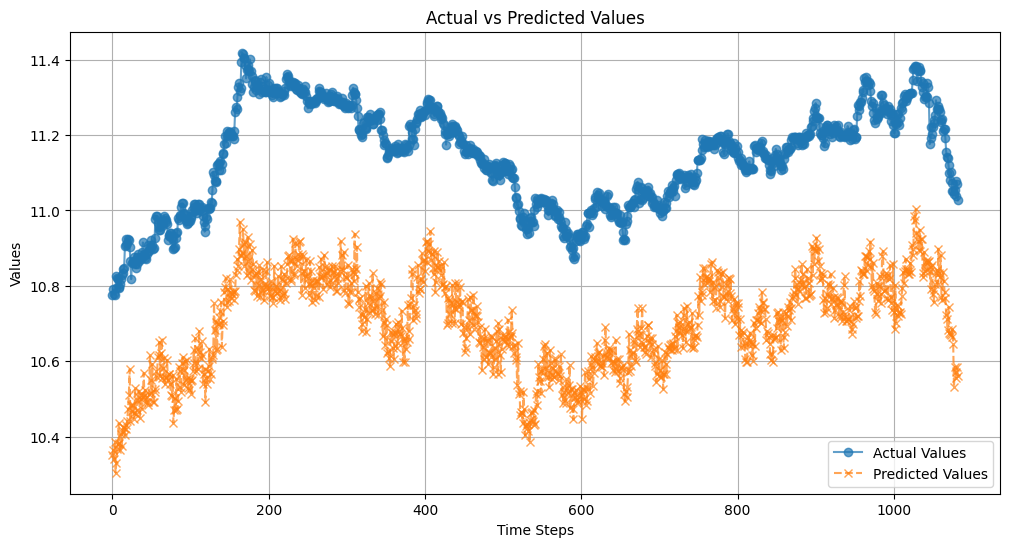

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper21.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 22

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper22", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper22.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper22 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper22.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper22.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper22.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper22.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.4713 - mse: 0.4713 - val_loss: 0.0265 - val_mse: 0.0265 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0266 - val_mse: 0.0266 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 8.6514e-04 - mse: 8.6514e-04 - val_loss: 0.0239 - val_mse: 0.0239 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.3209e-04 - mse: 7.3209e-04 - val_loss: 0.0233 - val_mse: 0.0233 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7870e-04 - mse: 5.7870e-04 - val_loss: 0.0230 - val_mse: 0.0230 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.0948e-04 - mse: 5.0948e-04 - val_loss: 0.0234 - val_mse: 0.0234 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.6810e-04 - mse: 4.6810e-04 - val_loss: 0.0217 -

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_22            │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_16 (Conv1D)        │ (None, 88, 64)         │          2,560 │ input_layer_22[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_16          │ (None, 44, 64)         │              0 │ conv1d_16[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_53 (LSTM)            │ (None, 44, 64)         │         33,024 │ max_pooling1d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_16[0][0… │
│                           │                        │                │ lstm_53[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_10 (Flatten)      │ (None, 2816)           │              0 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_43 (Dense)          │ (None, 64)             │        180,288 │ flatten_10[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_54 (LSTM)            │ (None, 64)             │         33,024 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 64)             │              0 │ dense_43[0][0],        │
│                           │                        │                │ lstm_54[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_44 (Dense)          │ (None, 64)             │          4,160 │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_45 (Dense)          │ (None, 1)              │             65 │ dense_44[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


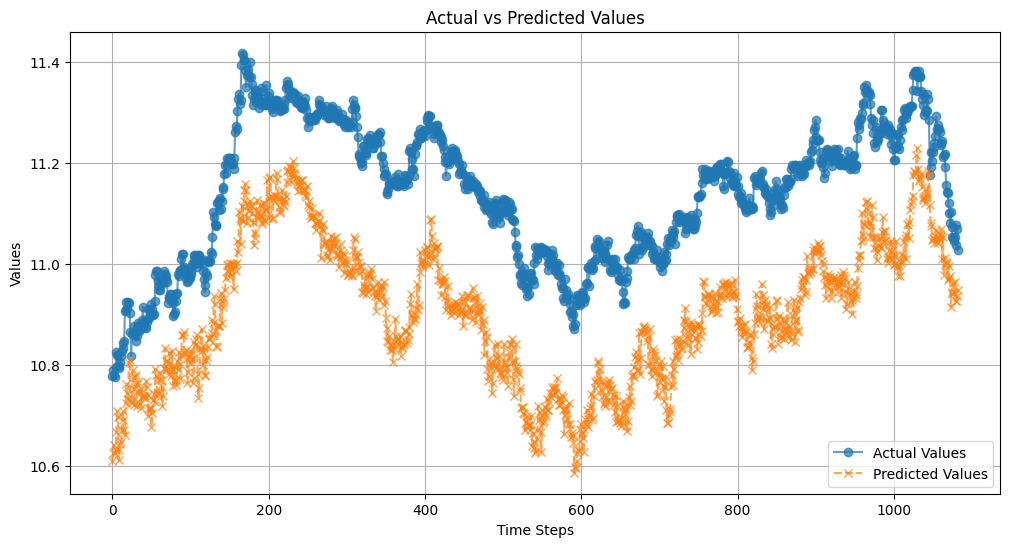

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper22.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
wandb.finish()

##### 23

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper23", config={
    "epochs": 50,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper23.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper23 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper23.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper23.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper23.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper23.summary()

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4362 - mse: 0.4362 - val_loss: 0.0099 - val_mse: 0.0099 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0091 - val_mse: 0.0091 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 5.7991e-04 - mse: 5.7991e-04 - val_loss: 0.0095 - val_mse: 0.0095 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 4.8196e-04 - mse: 4.8196e-04 - val_loss: 0.0096 - val_mse: 0.0096 - learning_rate: 0.0010
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 4.1560e-04 - mse: 4.1560e-04 - val_loss: 0.0100 - val_mse: 0.0100 - learning_rate: 0.0010
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 3.7456e-04 - mse: 3.7456e-04 - val_loss: 0.0101 - val_mse: 0.0101 - learning_rate: 0.0010
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 3.5219e-04 - mse: 3.5219e-04 - val_loss: 0.0105 - val_mse: 0.01

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_32            │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_24 (Conv1D)        │ (None, 88, 128)        │          5,120 │ input_layer_32[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_22          │ (None, 44, 128)        │              0 │ conv1d_24[0][0]        │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_79 (LSTM)            │ (None, 44, 128)        │        131,584 │ max_pooling1d_22[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_17 (Add)              │ (None, 44, 128)        │              0 │ max_pooling1d_22[0][0… │
│                           │                        │                │ lstm_79[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_12 (Flatten)      │ (None, 5632)           │              0 │ add_17[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_62 (Dense)          │ (None, 64)             │        360,512 │ flatten_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_80 (LSTM)            │ (None, 64)             │         49,408 │ add_17[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_18 (Add)              │ (None, 64)             │              0 │ dense_62[0][0],        │
│                           │                        │                │ lstm_80[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_63 (Dense)          │ (None, 64)             │          4,160 │ add_18[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_64 (Dense)          │ (None, 1)              │             65 │ dense_63[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,652,549 (6.30 MB)

 Trainable params: 550,849 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,101,700 (4.20 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


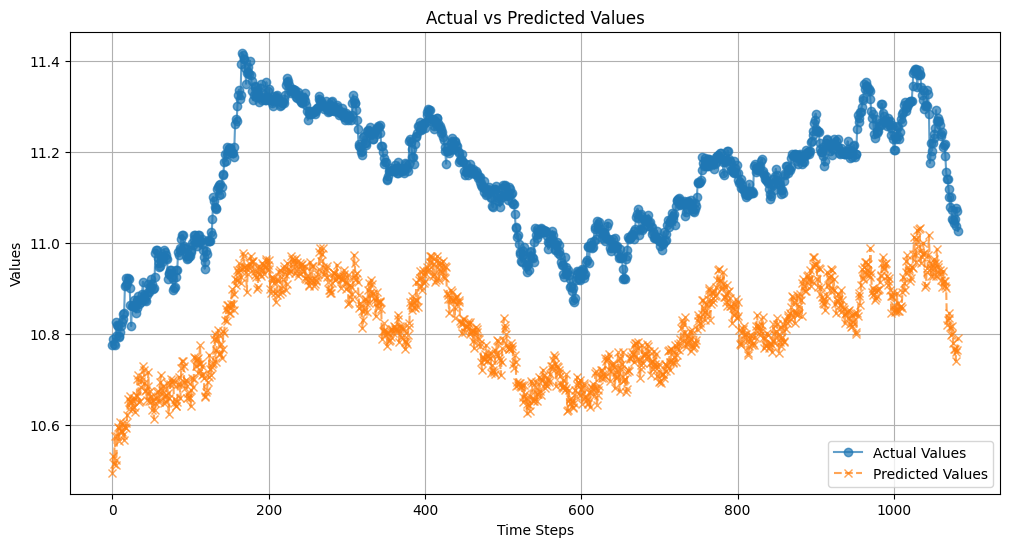

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper23.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 24

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper24", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [256,128],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper24.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

pool1_adjusted = Conv1D(256, kernel_size=1, activation='relu')(pool1)  # 차원 조정
skip1 = Add()([pool1_adjusted, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, new_dim)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 128)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper24 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper24.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper24.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper24.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper24.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 1.2316 - mse: 1.2316 - val_loss: 0.0175 - val_mse: 0.0175 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.4988e-04 - mse: 5.4988e-04 - val_loss: 0.0188 - val_mse: 0.0188 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1961e-04 - mse: 5.1961e-04 - val_loss: 0.0212 - val_mse: 0.0212 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.8792e-04 - mse: 3.8792e-04 - val_loss: 0.0214 - val_mse: 0.0214 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.8267e-04 - mse: 3.8267e-04 - val_loss: 0.0223 - val_mse: 0.0223 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.5965e-04 - mse: 3.5965e-04 - val_loss: 0.0231 - val_mse: 0.0231 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 7.5741e-04 - mse: 7.5741e-04 - val_loss: 

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


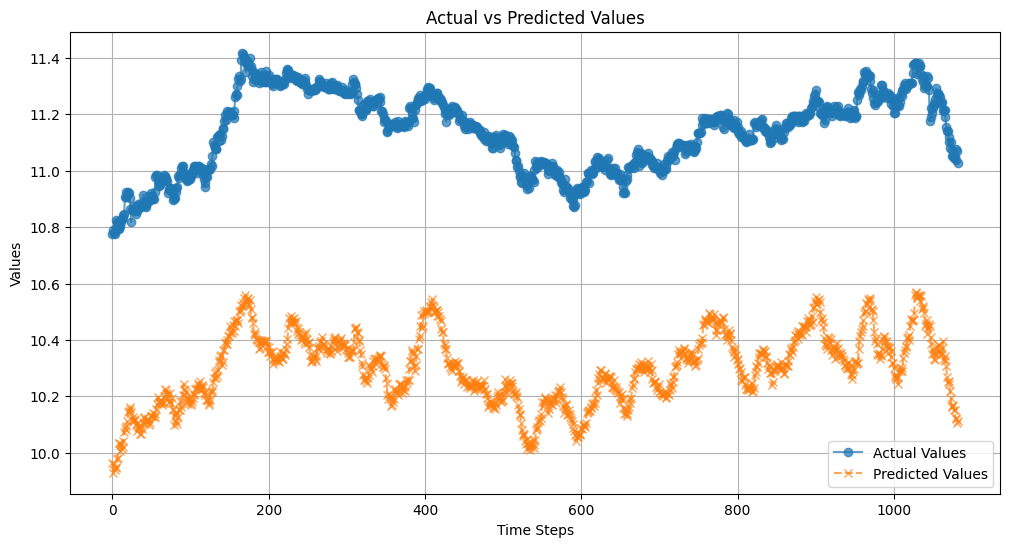

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper24.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 25

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper25", config={
    "epochs": 50,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper25.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper25 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper25.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper25.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper25.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper25.summary()

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.7672 - mse: 1.7672 - val_loss: 0.0186 - val_mse: 0.0186 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0172 - val_mse: 0.0172 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.8842e-04 - mse: 6.8842e-04 - val_loss: 0.0174 - val_mse: 0.0174 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.5761e-04 - mse: 5.5761e-04 - val_loss: 0.0173 - val_mse: 0.0173 - learning_rate: 0.0010
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.9469e-04 - mse: 4.9469e-04 - val_loss: 0.0173 - val_mse: 0.0173 - learning_rate: 0.0010
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.2664e-04 - mse: 4.2664e-04 - val_loss: 0.0172 - val_mse: 0.0172 - learning_rate: 0.0010
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.9157e-04 - mse: 3.9157e-04 - val_loss: 0.0170 - val_mse: 0.01

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step


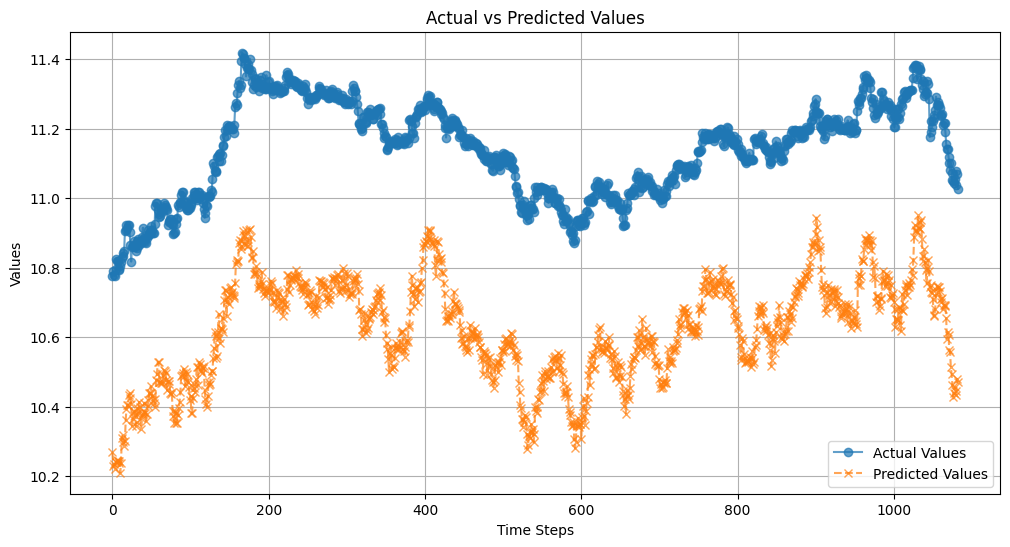

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper25.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 26

In [ ]:
wandb.finish()

In [ ]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # 감소율을 낮춤
    patience=8,  # 기다리는 에포크 수 증가
    min_lr=1e-6,
    verbose=1
)

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper26", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper26.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper26 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper26.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper26.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper26.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper26.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.9438 - mse: 0.9438 - val_loss: 0.0115 - val_mse: 0.0115 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 6.1513e-04 - mse: 6.1513e-04 - val_loss: 0.0102 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6161e-04 - mse: 4.6161e-04 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.7695e-04 - mse: 3.7695e-04 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 3.3473e-04 - mse: 3.3473e-04 - val_loss: 0.0105 - val_mse: 0.0105 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.0802e-04 - mse: 3.0802e-04 - val_loss: 0.0098 - val_mse: 0.0098 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.7713e-04 - mse: 2.7713e-04 - val_loss: 

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


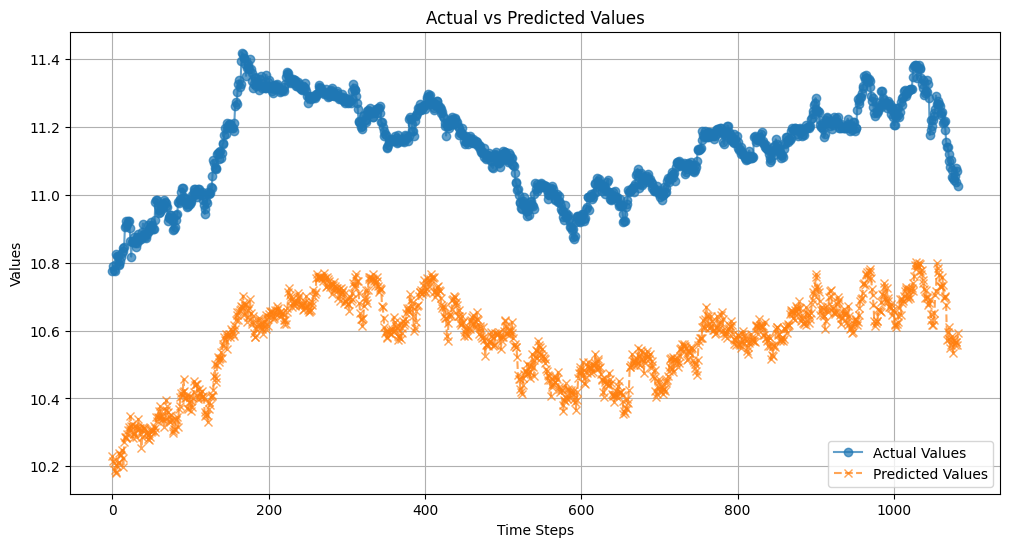

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper26.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 27

In [ ]:
wandb.finish()

In [ ]:
from tensorflow.keras.layers import Reshape

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper27", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [128, 64, 32],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper27.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(128, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)
# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)
skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)
skip2 = Add()([skip1_reshaped, lstm2])

lstm3 = LSTM(wandb.config.lstm_units[2], activation='tanh')(Reshape((1, wandb.config.lstm_units[1]))(skip2))

# Skip Connection 추가
skip2_flattened = Flatten()(skip2)
skip2_reshaped = Dense(wandb.config.lstm_units[2])(skip2_flattened)
skip3 = Add()([skip2_reshaped, lstm3])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip3)
output_layer = Dense(1)(dense1)

# 모델 정의 및 컴파일
model_int_hyper27 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper27.compile(optimizer=wandb.config.optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper27.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        #verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper27.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper27.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.7228 - mse: 0.7228 - val_loss: 0.0091 - val_mse: 0.0091 - learning_rate: 0.0010
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.6471e-04 - mse: 5.6471e-04 - val_loss: 0.0085 - val_mse: 0.0085 - learning_rate: 0.0010
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4.1966e-04 - mse: 4.1966e-04 - val_loss: 0.0089 - val_mse: 0.0089 - learning_rate: 0.0010
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 3.2347e-04 - mse: 3.2347e-04 - val_loss: 0.0102 - val_mse: 0.0102 - learning_rate: 0.0010
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.8485e-04 - mse: 2.8485e-04 - val_loss: 0.0108 - val_mse: 0.0108 - learning_rate: 0.0010
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.2760e-04 - mse: 3.2760e-04 - val_loss: 0.0107 - val_mse: 0.0107 - learning_rate: 0.0010
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.7009e-04 - mse: 2.7009e-04 - val_loss: 

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


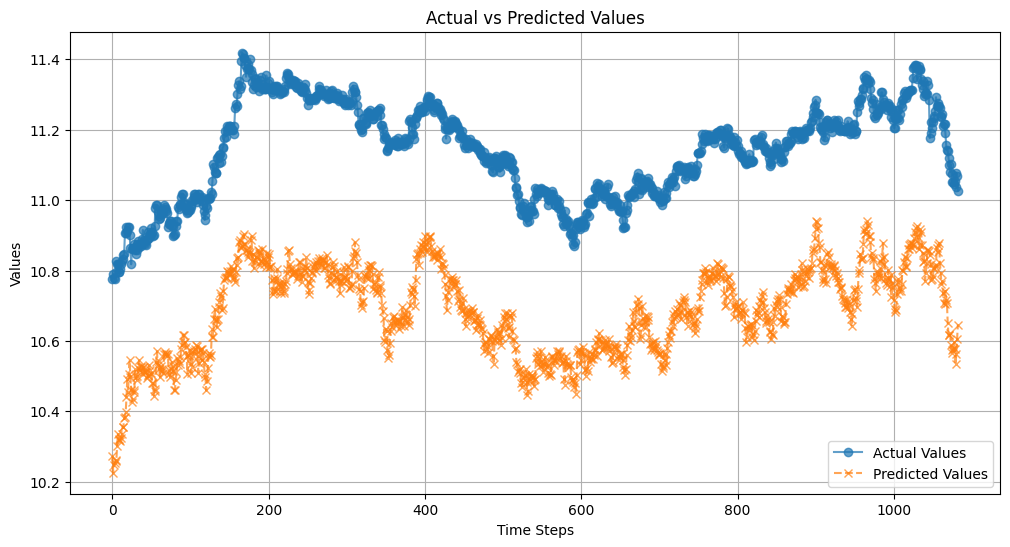

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper27.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 28

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper28", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper28.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper28 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper28.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper28.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper28.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper28.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0990 - val_mse: 0.0990 - learning_rate: 1.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.1052 - val_mse: 0.1052 - learning_rate: 1.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.1031 - val_mse: 0.1031 - learning_rate: 1.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 9.1643e-04 - mse: 9.1643e-04 - val_loss: 0.0883 - val_mse: 0.0883 - learning_rate: 1.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.2667e-04 - mse: 8.2667e-04 - val_loss: 0.0894 - val_mse: 0.0894 - learning_rate: 1.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 6.2622e-04 - mse: 6.2622e-04 - val_loss: 0.0990 - val_mse: 0.0990 - learning_rate: 1.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 7.1600e-04 - mse: 7.1600e

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


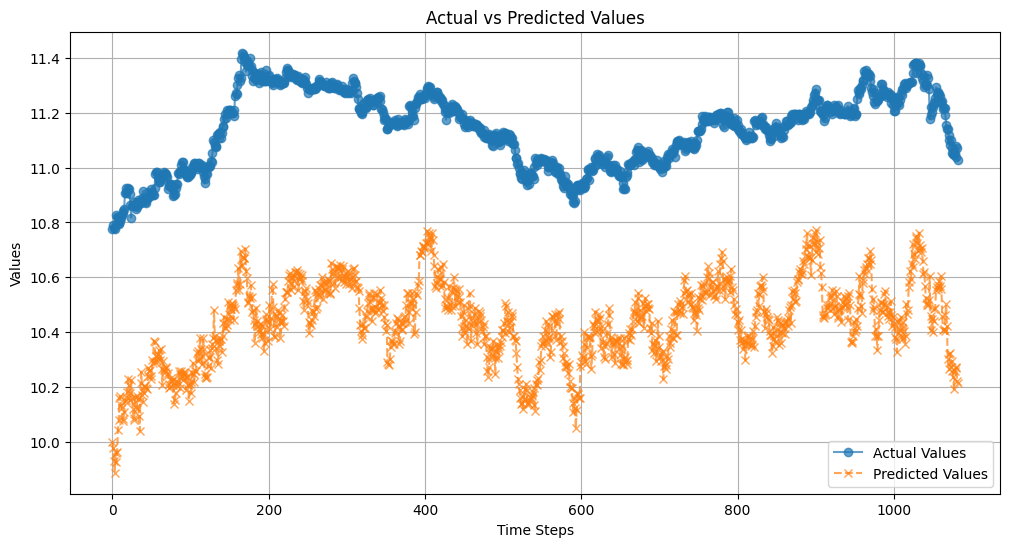

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper28.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 29

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper29", config={
    "epochs": 50,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper29.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper29 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper29.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper29.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper29.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper29.summary()

Epoch 1/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0197 - mse: 0.0197 - val_loss: 0.0377 - val_mse: 0.0377 - learning_rate: 1.0000e-04
Epoch 2/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0384 - val_mse: 0.0384 - learning_rate: 1.0000e-04
Epoch 3/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0361 - val_mse: 0.0361 - learning_rate: 1.0000e-04
Epoch 4/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.2637e-04 - mse: 8.2637e-04 - val_loss: 0.0410 - val_mse: 0.0410 - learning_rate: 1.0000e-04
Epoch 5/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.1846e-04 - mse: 8.1846e-04 - val_loss: 0.0368 - val_mse: 0.0368 - learning_rate: 1.0000e-04
Epoch 6/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.5999e-04 - mse: 5.5999e-04 - val_loss: 0.0395 - val_mse: 0.0395 - learning_rate: 1.0000e-04
Epoch 7/50
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4112e-04 - mse: 5.4112e-04 - v

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_1           │ (None, 44, 64)         │              0 │ conv1d_1[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_1[0][0], │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 2816)           │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 64)             │        180,288 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 64)             │         33,024 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_3 (Add)               │ (None, 64)             │              0 │ dense_3[0][0],         │
│                           │                        │                │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_4 (Dense)           │ (None, 64)             │          4,160 │ add_3[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_5 (Dense)           │ (None, 1)              │             65 │ dense_4[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


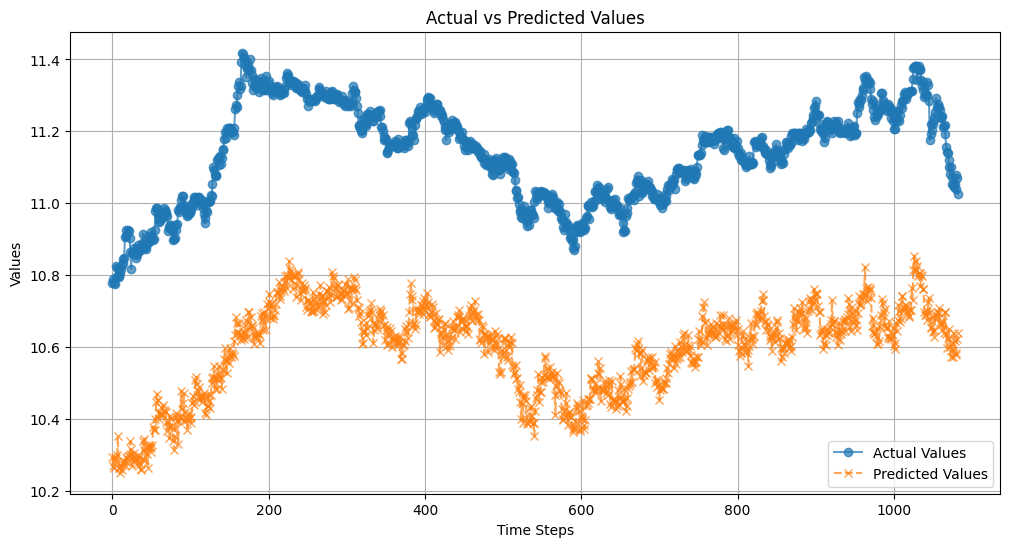

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper29.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 30

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper30", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper30.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0005)
model_int_hyper30 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper30.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper30.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper30.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper30.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0866 - mse: 0.0866 - val_loss: 0.0297 - val_mse: 0.0297 - learning_rate: 5.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0291 - val_mse: 0.0291 - learning_rate: 5.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0334 - val_mse: 0.0334 - learning_rate: 5.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.4169e-04 - mse: 9.4169e-04 - val_loss: 0.0306 - val_mse: 0.0306 - learning_rate: 5.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 9.6356e-04 - mse: 9.6356e-04 - val_loss: 0.0342 - val_mse: 0.0342 - learning_rate: 5.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.6922e-04 - mse: 7.6922e-04 - val_loss: 0.0297 - val_mse: 0.0297 - learning_rate: 5.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0289 

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_2 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_2           │ (None, 44, 64)         │              0 │ conv1d_2[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_4 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_4 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_2[0][0], │
│                           │                        │                │ lstm_4[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_2 (Flatten)       │ (None, 2816)           │              0 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_6 (Dense)           │ (None, 64)             │        180,288 │ flatten_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_5 (LSTM)             │ (None, 64)             │         33,024 │ add_4[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_5 (Add)               │ (None, 64)             │              0 │ dense_6[0][0],         │
│                           │                        │                │ lstm_5[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 64)             │          4,160 │ add_5[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 1)              │             65 │ dense_7[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


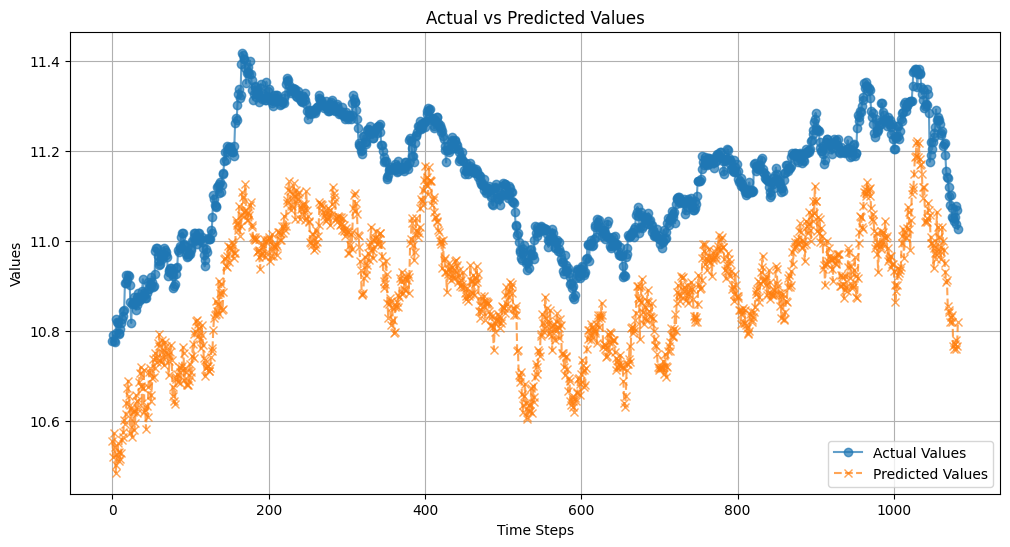

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper30.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 31

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper31", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper31.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper31 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper31.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper31.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper31.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper31.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2336 - mse: 0.2336 - val_loss: 0.0918 - val_mse: 0.0918 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0958 - val_mse: 0.0958 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0927 - val_mse: 0.0927 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0957 - val_mse: 0.0957 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0935 - val_mse: 0.0935 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0844 - val_mse: 0.0844 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0789 - val_mse: 0.0789 - lear

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 44, 64)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_3[0][0], │
│                           │                        │                │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 2816)           │              0 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │        180,288 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 64)             │         33,024 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 64)             │              0 │ dense_9[0][0],         │
│                           │                        │                │ lstm_7[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          4,160 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


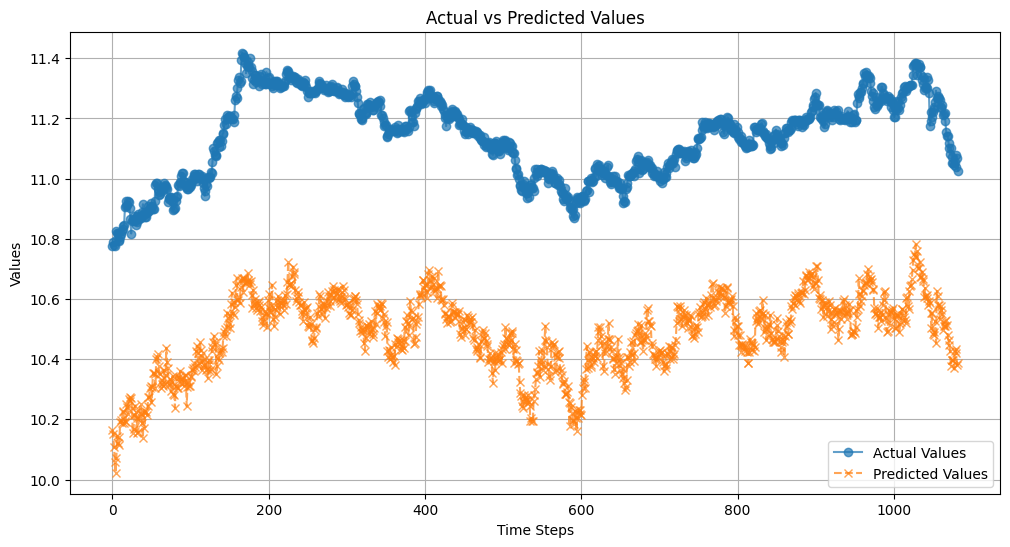

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper31.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 32

In [ ]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper32", config={
    "epochs": 100,
    "batch_size": 32,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper32.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0005)
model_int_hyper32 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper32.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper32.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper32.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper32.summary()

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0875 - mse: 0.0875 - val_loss: 0.0348 - val_mse: 0.0348 - learning_rate: 5.0000e-04
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0371 - val_mse: 0.0371 - learning_rate: 5.0000e-04
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.6920e-04 - mse: 9.6920e-04 - val_loss: 0.0356 - val_mse: 0.0356 - learning_rate: 5.0000e-04
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 7.5731e-04 - mse: 7.5731e-04 - val_loss: 0.0376 - val_mse: 0.0376 - learning_rate: 5.0000e-04
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.2245e-04 - mse: 5.2245e-04 - val_loss: 0.0376 - val_mse: 0.0376 - learning_rate: 5.0000e-04
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7685e-04 - mse: 4.7685e-04 - val_loss: 0.0346 - val_mse: 0.0346 - learning_rate: 5.0000e-04
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.2693e-04 - mse: 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 44, 64)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_4[0][0], │
│                           │                        │                │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 2816)           │              0 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 64)             │        180,288 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 64)             │         33,024 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 64)             │              0 │ dense_12[0][0],        │
│                           │                        │                │ lstm_9[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 64)             │          4,160 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             65 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


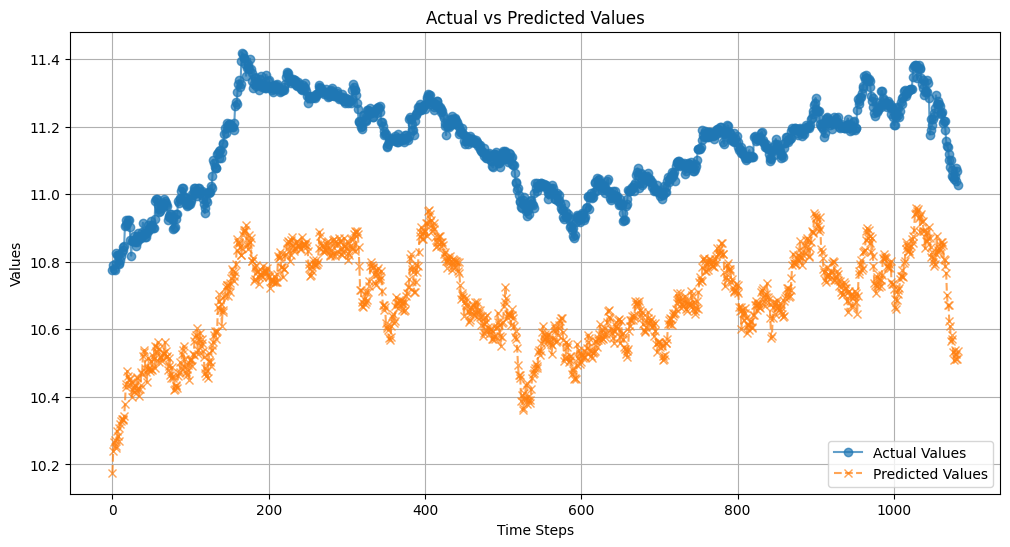

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper32.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 33

In [124]:
wandb.finish()

In [ ]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper33", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper33.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int, selected_y_train_int, time_steps)
X_val, y_val = create_sequences(selected_x_val_int, selected_y_val_int, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper33 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper33.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper33.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper33.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper33.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0951 - val_mse: 0.0951 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0636 - val_mse: 0.0636 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 8.4350e-04 - mse: 8.4350e-04 - val_loss: 0.0545 - val_mse: 0.0545 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.3678e-04 - mse: 7.3678e-04 - val_loss: 0.0472 - val_mse: 0.0472 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.4997e-04 - mse: 6.4997e-04 - val_loss: 0.0458 - val_mse: 0.0458 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 5.7295e-04 - mse: 5.7295e-04 - val_loss: 0.0422 - val_mse: 0.0422 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.5517e-04 - mse: 5.5517e-04 - v

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_5 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_5           │ (None, 44, 64)         │              0 │ conv1d_5[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ (None, 44, 64)         │         33,024 │ max_pooling1d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_10 (Add)              │ (None, 44, 64)         │              0 │ max_pooling1d_5[0][0], │
│                           │                        │                │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_5 (Flatten)       │ (None, 2816)           │              0 │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 64)             │        180,288 │ flatten_5[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 64)             │         33,024 │ add_10[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_11 (Add)              │ (None, 64)             │              0 │ dense_15[0][0],        │
│                           │                        │                │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 64)             │          4,160 │ add_11[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 1)              │             65 │ dense_16[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 759,365 (2.90 MB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506,244 (1.93 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


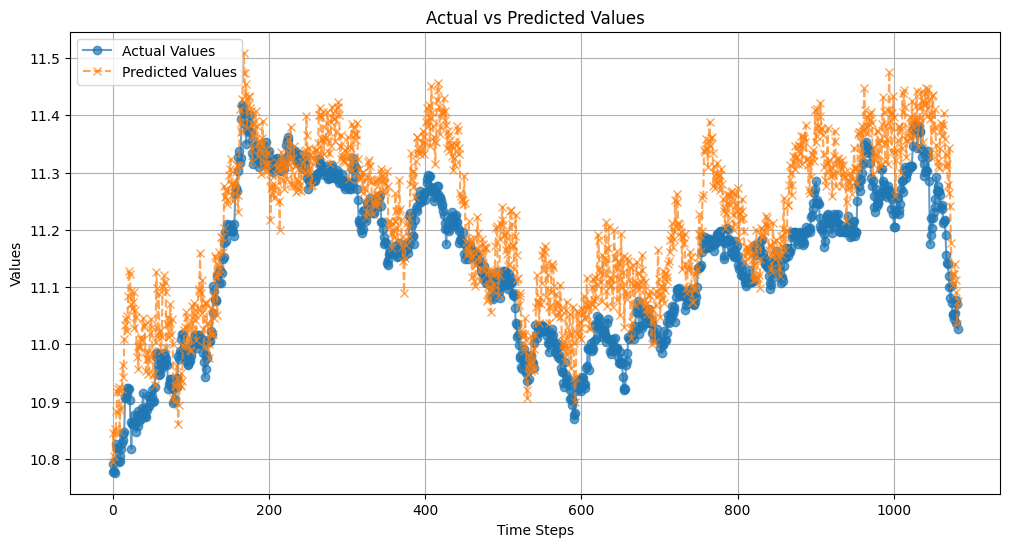

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)
y_test = selected_y_test_int[wandb.config.time_steps:]

y_pred = model_int_hyper33.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Values', linestyle='-', marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--', marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

##### 33 - good

In [ ]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)

y_pred = model_int_hyper33.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values')#, linestyle='-')#, marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values')#, linestyle='--')#, marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test , y_pred ))

# MAE 계산
mae = mean_absolute_error(y_test , y_pred )

# R² 계산
r2 = r2_score(y_test , y_pred )

# 결과 출력
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.0936
MAE: 0.0788
R²: 0.5351


모델 불러오기

In [125]:
wandb.init(project="LSTM Final - Interp", name="hyper33", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

In [126]:
input_layer = Input(shape=(90, len(features0_int)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

model_int_hyper33_loaded = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper33_loaded.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mse'])

In [127]:
model_int_hyper33_loaded.load_weights('/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper33.weights.h5')

# 모델 요약 확인
model_int_hyper33_loaded.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 90, 13)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_4 (Conv1D)         │ (None, 88, 64)         │          2,560 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 44, 64)         │              0 │ conv1d_4[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_8 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_4[0][0], │
│                           │                        │                │ lstm_8[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_4 (Flatten)       │ (None, 2816)           │              0 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 64)             │        180,288 │ flatten_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_9 (LSTM)             │ (None, 64)             │         33,024 │ add_8[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_9 (Add)               │ (None, 64)             │              0 │ dense_12[0][0],        │
│                           │                        │                │ lstm_9[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 64)             │          4,160 │ add_9[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │             65 │ dense_13[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 253,121 (988.75 KB)

 Trainable params: 253,121 (988.75 KB)

 Non-trainable params: 0 (0.00 B)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


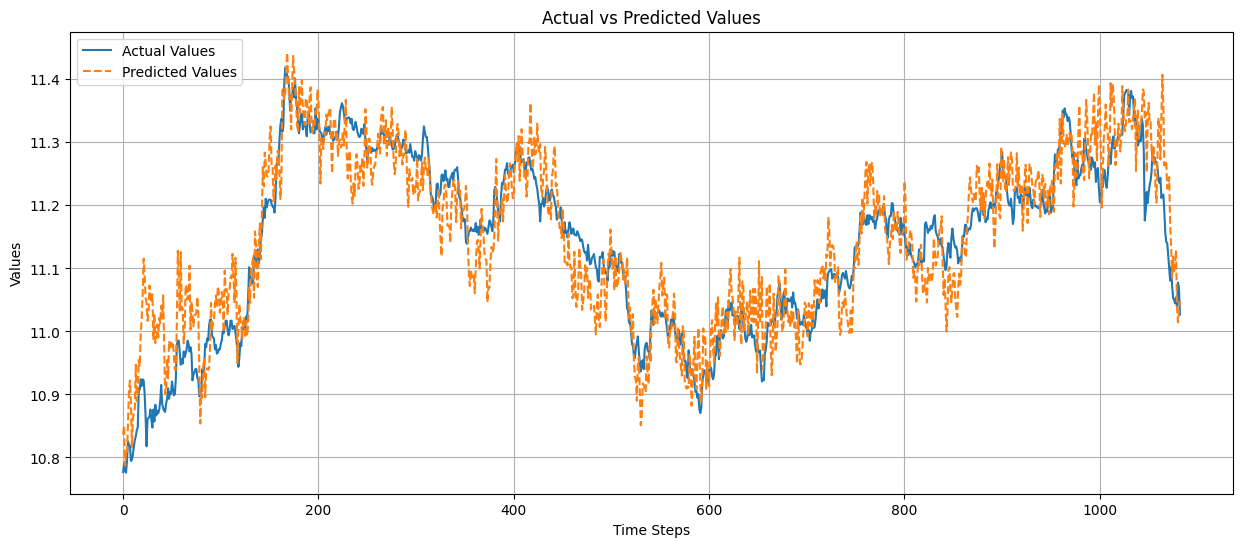

In [131]:
X_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)

y_pred = model_int_hyper33_loaded.predict(X_test)
y_pred = y_scaler_selected_int_df.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df.inverse_transform(y_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values', linestyle='-')#, marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', linestyle='--')#, marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
import matplotlib.dates as mdates

In [141]:
ddf = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/int_final.csv')
ddf['Date'] = pd.to_datetime(ddf['Date'])
dates = ddf['Date']

In [142]:
x_test, y_test = create_sequences(selected_x_test_int, selected_y_test_int, wandb.config.time_steps)

In [135]:
print(y_test)

[[1.17285946]
 [1.17842686]
 [1.17372088]
 ...
 [1.29704176]
 [1.2938373 ]
 [1.2760901 ]]


In [136]:
y_test = y_scaler_selected_int_df.inverse_transform(y_test)
print(y_test)

[[10.77687078]
 [10.79034947]
 [10.77895629]
 ...
 [11.07751648]
 [11.06975849]
 [11.02679245]]


In [137]:
y_test = np.round(np.exp(y_test),4)
print(y_test)

[[47900.]
 [48550.]
 [48000.]
 ...
 [64700.]
 [64200.]
 [61500.]]


In [143]:
test_dates = ddf['Date'][4782:]
future_dates = pd.date_range(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=90)

In [139]:
x = np.array([0.5])
x = np.expand_dims(x, axis=1)  # 차원을 확장하여 새로운 축 추가
print(x.shape)  # 출력: (1, 1)
print(x)
x = np.squeeze(x)
print(x.shape)  # 출력: (1, 1)
print(x)

(1, 1)
[[0.5]]
()
0.5


In [140]:
print(y_test[:10])

[[47900.]
 [48550.]
 [48000.]
 [47850.]
 [48800.]
 [50300.]
 [50000.]
 [49950.]
 [48750.]
 [48850.]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Day 1 Prediction: [[62838.59]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Day 2 Prediction: [[60685.566]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 3 Prediction: [[64381.293]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Day 4 Prediction: [[63271.492]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Day 5 Prediction: [[60603.15]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Day 6 Prediction: [[59767.688]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Day 7 Prediction: [[62681.176]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 8 Prediction: [[64869.906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 9 Prediction: [[62655.41]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 10 Prediction: [[60617.254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Day 11 Prediction: [[58791.66]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 12 Prediction: [[57001.145]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Day 13 Prediction: [[59668.816]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Day 14 Prediction: [[57422.742]]
1/1 ━━━━━━━━━━━━━━━

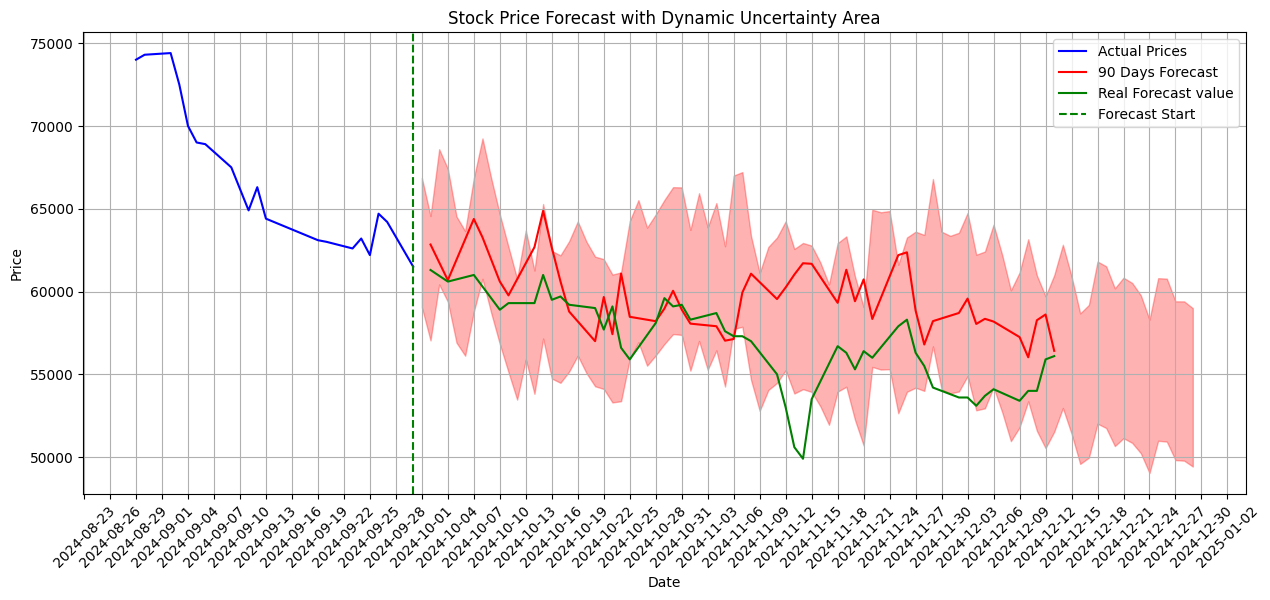

In [144]:
def predict_future_dynamic(model, x_test, scaler, steps=90, feature_generator=None):
    future_predictions = []
    upper_bounds = []
    lower_bounds = []

    current_input = x_test[-1:]

    for i in range(steps):
        # 예측 수행
        prediction = model.predict(current_input)[0, 0]
        prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
        prediction_inverse = np.exp(prediction_inverse)
        print(f"Day {i+1} Prediction: {prediction_inverse}")

        # 동적으로 불확실성 계산 (처음에는 좁고 끝으로 갈수록 퍼지는 영역)
        uncertainty = 0.02 + 0.01 * i / steps  # 불확실성 비율 증가 (처음에는 2%, 끝에는 약 12%까지)

        upper_bound = prediction * (1 + uncertainty)
        lower_bound = prediction * (1 - uncertainty)

        future_predictions.append(prediction)
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction

    return np.array(future_predictions), np.array(upper_bounds), np.array(lower_bounds)

def simple_feature_generator(current_input, prediction):
    """
    피처 값을 단순히 이전 값으로 유지하는 예제 함수
    """
    last_features = current_input[0, -1, :-1]  # 마지막 피처 값 가져오기
    return last_features

feature_generator = simple_feature_generator
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(model_int_hyper33_loaded, x_test, scaler=y_scaler_selected_int_df, steps=90, feature_generator=feature_generator)


y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)]) # 스케일 복원 후 1D 배열로 변환
y_test_rever = np.exp(y_test_rever)  # 로그 복원

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))  # 2D 배열로 변환하여 스케일 복원
future_90_days_rever = np.exp(future_90_days_rever)  # 로그 복원

# upper_90_days 및 lower_90_days도 동일 처리
upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))  # 2D 배열로 변환하여 스케일 복원
upper_90_days_rever = np.exp(upper_90_days_rever)  # 로그 복원

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))  # 2D 배열로 변환하여 스케일 복원
lower_90_days_rever = np.exp(lower_90_days_rever)

future_dates = pd.date_range(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=90)

real_close_value = np.expand_dims(real_close.values, axis=1)

plt.figure(figsize=(15, 6))
plt.plot(test_dates[-20:], y_test_rever[-20:], label='Actual Prices', color='blue')
plt.plot(real_close.index, future_90_days_rever[:51], label='90 Days Forecast', color='red')
plt.plot(real_close.index, real_close.values, label='Real Forecast value', color = 'green')
plt.fill_between(future_dates, upper_90_days_rever.ravel(), lower_90_days_rever.ravel(), color='red', alpha=0.3)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='green', linestyle='--', label='Forecast Start')

plt.title('Stock Price Forecast with Dynamic Uncertainty Area')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Day 1 Prediction: [[62838.59]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Day 2 Prediction: [[60685.566]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Day 3 Prediction: [[64381.293]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Day 4 Prediction: [[63271.492]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Day 5 Prediction: [[60603.15]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Day 6 Prediction: [[59767.688]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Day 7 Prediction: [[62681.176]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Day 8 Prediction: [[64869.906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Day 9 Prediction: [[62655.41]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Day 10 Prediction: [[60617.254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Day 11 Prediction: [[58791.66]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Day 12 Prediction: [[57001.145]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Day 13 Prediction: [[59668.816]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Day 14 Prediction: [[57422.742]]
1/1 ━━━━━━━━━━━━━━

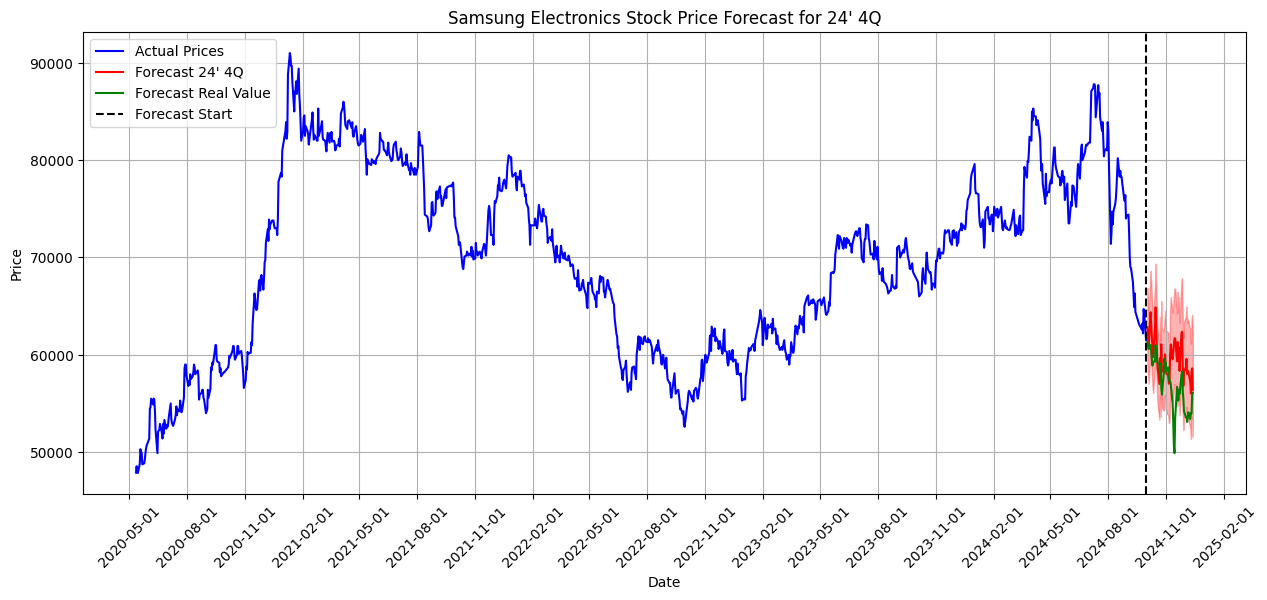

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def predict_future_dynamic(model, x_test, scaler, steps=51, feature_generator=None):
    future_predictions = []
    upper_bounds = []
    lower_bounds = []

    current_input = x_test[-1:]

    for i in range(steps):
        # 예측 수행
        prediction = model.predict(current_input)[0, 0]
        prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
        prediction_inverse = np.exp(prediction_inverse)
        print(f"Day {i+1} Prediction: {prediction_inverse}")

        # 동적으로 불확실성 계산 (처음에는 좁고 끝으로 갈수록 퍼지는 영역)
        uncertainty = 0.02 + 0.01 * i / steps  # 불확실성 비율 증가 (처음에는 2%, 끝에는 약 12%까지)

        upper_bound = prediction * (1 + uncertainty)
        lower_bound = prediction * (1 - uncertainty)

        future_predictions.append(prediction)
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction

    return np.array(future_predictions), np.array(upper_bounds), np.array(lower_bounds)

def simple_feature_generator(current_input, prediction):
    """
    피처 값을 단순히 이전 값으로 유지하는 예제 함수
    """
    last_features = current_input[0, -1, :-1]  # 마지막 피처 값 가져오기
    return last_features

# 한국 증권시장 공휴일 정의 (2024년 예제)
korea_holidays = pd.to_datetime([
    '2024-09-16', '2024-09-17', '2024-09-18',
    '2024-10-01', '2024-10-03', '2024-10-09',
])

def get_trading_days(start_date, periods, holidays):
    """
    시작 날짜부터 주말 및 공휴일을 제외한 거래일 계산
    """
    trading_days = []
    current_date = start_date
    while len(trading_days) < periods:
        if current_date.weekday() < 5 and current_date not in holidays:  # 주말 및 공휴일 제외
            trading_days.append(current_date)
        current_date += datetime.timedelta(days=1)
    return pd.to_datetime(trading_days)

# 미래 90 거래일 계산
# 미래 90 거래일 계산
future_dates = get_trading_days(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=51, holidays=korea_holidays)


# 예측 수행
feature_generator = simple_feature_generator
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(
    model_int_hyper33_loaded, x_test, scaler=y_scaler_selected_int_df, steps=51, feature_generator=feature_generator
)

# 스케일 복원 및 로그 복원
y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

# 그래프 출력
plt.figure(figsize=(15, 6))
plt.plot(test_dates, y_test_rever, label='Actual Prices', color='blue')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='red')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='red', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Day 1 Prediction: [[62838.59]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Day 2 Prediction: [[60685.566]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Day 3 Prediction: [[64381.293]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Day 4 Prediction: [[63271.492]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Day 5 Prediction: [[60603.15]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Day 6 Prediction: [[59767.688]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Day 7 Prediction: [[62681.176]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Day 8 Prediction: [[64869.906]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Day 9 Prediction: [[62655.41]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Day 10 Prediction: [[60617.254]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Day 11 Prediction: [[58791.66]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Day 12 Prediction: [[57001.145]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Day 13 Prediction: [[59668.816]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Day 14 Prediction: [[57422.742]]
1/1 ━━━━━

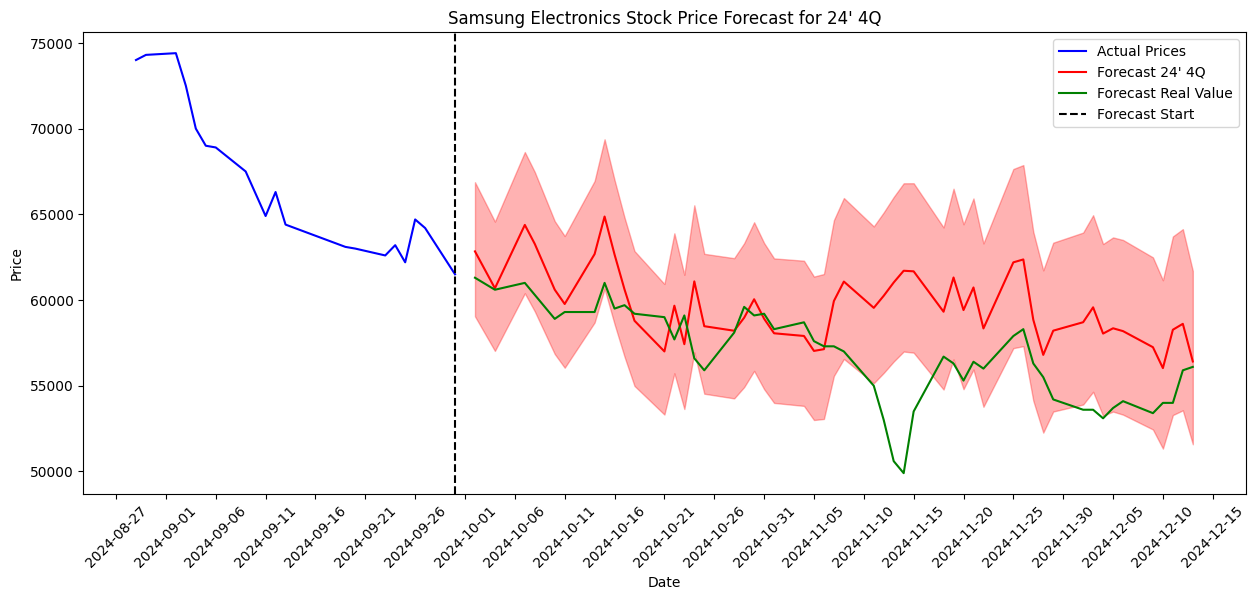

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def predict_future_dynamic(model, x_test, scaler, steps=51, feature_generator=None):
    future_predictions = []
    upper_bounds = []
    lower_bounds = []

    current_input = x_test[-1:]

    for i in range(steps):
        # 예측 수행
        prediction = model.predict(current_input)[0, 0]
        prediction_inverse = scaler.inverse_transform(prediction.reshape(-1, 1))
        prediction_inverse = np.exp(prediction_inverse)
        print(f"Day {i+1} Prediction: {prediction_inverse}")

        # 동적으로 불확실성 계산 (처음에는 좁고 끝으로 갈수록 퍼지는 영역)
        uncertainty = 0.02 + 0.01 * i / steps  # 불확실성 비율 증가 (처음에는 2%, 끝에는 약 12%까지)

        upper_bound = prediction * (1 + uncertainty)
        lower_bound = prediction * (1 - uncertainty)

        future_predictions.append(prediction)
        upper_bounds.append(upper_bound)
        lower_bounds.append(lower_bound)

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction

    return np.array(future_predictions), np.array(upper_bounds), np.array(lower_bounds)

def simple_feature_generator(current_input, prediction):
    """
    피처 값을 단순히 이전 값으로 유지하는 예제 함수
    """
    last_features = current_input[0, -1, :-1]  # 마지막 피처 값 가져오기
    return last_features

# 한국 증권시장 공휴일 정의 (2024년 예제)
korea_holidays = pd.to_datetime([
    '2024-09-16', '2024-09-17', '2024-09-18',
    '2024-10-01', '2024-10-03', '2024-10-09',
])

def get_trading_days(start_date, periods, holidays):
    """
    시작 날짜부터 주말 및 공휴일을 제외한 거래일 계산
    """
    trading_days = []
    current_date = start_date
    while len(trading_days) < periods:
        if current_date.weekday() < 5 and current_date not in holidays:  # 주말 및 공휴일 제외
            trading_days.append(current_date)
        current_date += datetime.timedelta(days=1)
    return pd.to_datetime(trading_days)

# 미래 90 거래일 계산
# 미래 90 거래일 계산
future_dates = get_trading_days(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=51, holidays=korea_holidays)


# 예측 수행
feature_generator = simple_feature_generator
future_90_days, upper_90_days, lower_90_days = predict_future_dynamic(
    model_int_hyper33_loaded, x_test, scaler=y_scaler_selected_int_df, steps=51, feature_generator=feature_generator
)

# 스케일 복원 및 로그 복원
y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

# 그래프 출력
plt.figure(figsize=(15, 6))
plt.plot(test_dates[-20:], y_test_rever[-20:], label='Actual Prices', color='blue')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='red')
plt.plot(real_close.index, real_close.values, label='Forecast Real Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='red', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='black', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast for 24\' 4Q')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)
plt.legend(loc='best')
#plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

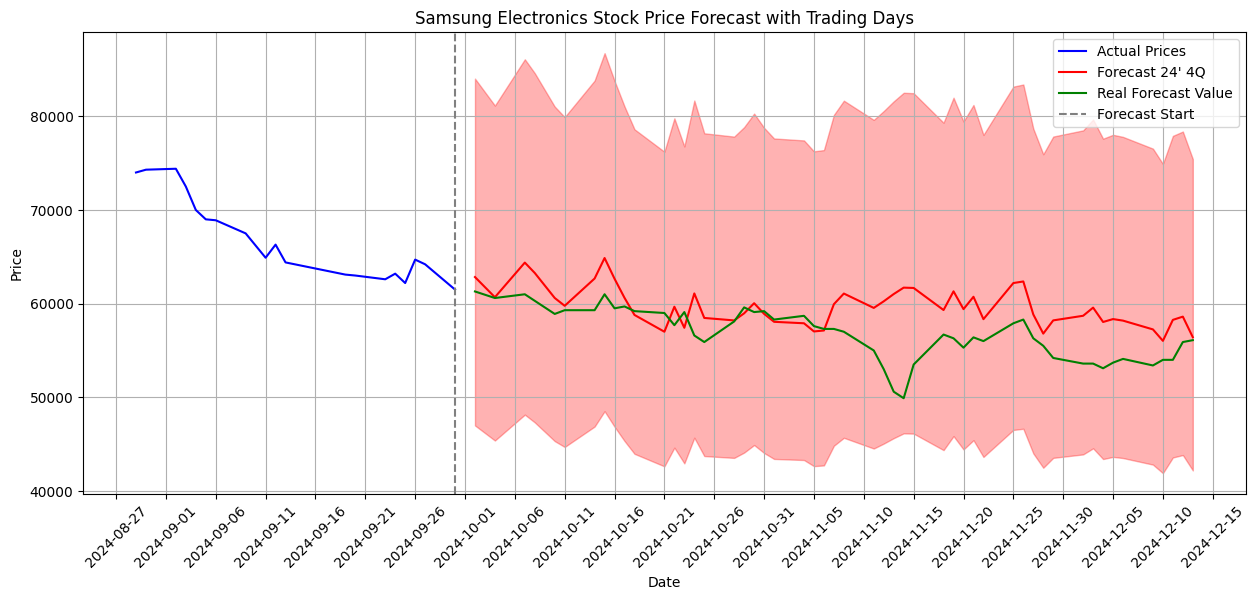

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

def predict_future_confidence(model, x_test, steps=90, feature_generator=None):
    future_predictions = []
    current_input = x_test[-1:]

    for i in range(steps):
        prediction = model.predict(current_input)[0, 0]
        future_predictions.append(prediction)

        # Confidence Interval 계산 (표준편차 기반)
        if i == 0:
            std = np.std(x_test[:, :, -1])  # 과거 데이터 기반 변동성 계산
        upper_bound = np.array(future_predictions) + 1.96 * std  # 95% Confidence Interval 상한선
        lower_bound = np.array(future_predictions) - 1.96 * std  # 95% Confidence Interval 하한선

        if feature_generator:
            next_features = feature_generator(current_input, prediction)
        else:
            next_features = current_input[0, 1:, :-1]

        current_input = np.roll(current_input, shift=-1, axis=1)
        current_input[0, -1, :-1] = next_features
        current_input[0, -1, -1] = prediction

    return np.array(future_predictions), upper_bound, lower_bound

def simple_feature_generator(current_input, prediction):
    """
    피처 값을 단순히 이전 값으로 유지하는 예제 함수
    """
    last_features = current_input[0, -1, :-1]  # 마지막 피처 값 가져오기
    return last_features

# 한국 증권시장 공휴일 정의 (2024년 예제)
korea_holidays = pd.to_datetime([
    '2024-09-16', '2024-09-17', '2024-09-18',
    '2024-10-01', '2024-10-03', '2024-10-09',
])

def get_trading_days(start_date, periods, holidays):
    """
    시작 날짜부터 주말 및 공휴일을 제외한 거래일 계산
    """
    trading_days = []
    current_date = start_date
    while len(trading_days) < periods:
        if current_date.weekday() < 5 and current_date not in holidays:  # 주말 및 공휴일 제외
            trading_days.append(current_date)
        current_date += datetime.timedelta(days=1)
    return pd.to_datetime(trading_days)

# 미래 90 거래일 계산
# 미래 90 거래일 계산
future_dates = get_trading_days(test_dates.iloc[-1] + pd.Timedelta(days=1), periods=51, holidays=korea_holidays)


# 예측 수행
feature_generator = simple_feature_generator
future_90_days, upper_90_days, lower_90_days = predict_future_confidence(
    model_int_hyper33_loaded, x_test, steps=51, feature_generator=feature_generator
)

# 스케일 복원 및 로그 복원
y_test_rever = y_scaler_selected_int_df.inverse_transform(y_test[:len(test_dates)])
y_test_rever = np.exp(y_test_rever)

future_90_days_rever = y_scaler_selected_int_df.inverse_transform(future_90_days.reshape(-1, 1))
future_90_days_rever = np.exp(future_90_days_rever)

upper_90_days_rever = y_scaler_selected_int_df.inverse_transform(upper_90_days.reshape(-1, 1))
upper_90_days_rever = np.exp(upper_90_days_rever)

lower_90_days_rever = y_scaler_selected_int_df.inverse_transform(lower_90_days.reshape(-1, 1))
lower_90_days_rever = np.exp(lower_90_days_rever)

# 그래프 출력
plt.figure(figsize=(15, 6))
plt.plot(test_dates[-20:], y_test_rever[-20:], label='Actual Prices', color='blue')
plt.plot(future_dates[:len(future_90_days_rever)], future_90_days_rever[:len(future_dates)], label='Forecast 24\' 4Q', color='red')
plt.plot(real_close.index, real_close.values, label='Real Forecast Value', color='green')
plt.fill_between(
    future_dates[:len(future_90_days_rever)],
    upper_90_days_rever.ravel(),
    lower_90_days_rever.ravel(),
    color='red', alpha=0.3
)
forecast_start_date = test_dates.iloc[-1]
plt.axvline(x=forecast_start_date, color='gray', linestyle='--', label='Forecast Start')

plt.title('Samsung Electronics Stock Price Forecast with Trading Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [54]:
real_4th = pd.read_csv('/content/drive/MyDrive/Time Series Project/Stock Price/data/real_final_data/samsung_stock_now.csv')
real_4th.head()

Price  Adj Close      Close       High        Low       Open  \
0      Ticker  005930.KS  005930.KS  005930.KS  005930.KS  005930.KS   
1        Date        NaN        NaN        NaN        NaN        NaN   
2  2024-10-02    61300.0    61300.0    61900.0    59900.0    60500.0   
3  2024-10-04    60600.0    60600.0    61700.0    60500.0    61000.0   
4  2024-10-07    61000.0    61000.0    61900.0    59500.0    60200.0   

      Volume  
0  005930.KS  
1        NaN  
2   28473536  
3   24247578  
4   35066533

In [55]:
real_4th = real_4th.iloc[2:]
real_4th['Price'] = pd.to_datetime(real_4th['Price'])
real_4th = real_4th.set_index('Price')
real_4th.head()

<ipython-input-55-df49399e15c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_4th['Price'] = pd.to_datetime(real_4th['Price'])


Adj Close    Close     High      Low     Open    Volume
Price                                                             
2024-10-02   61300.0  61300.0  61900.0  59900.0  60500.0  28473536
2024-10-04   60600.0  60600.0  61700.0  60500.0  61000.0  24247578
2024-10-07   61000.0  61000.0  61900.0  59500.0  60200.0  35066533
2024-10-08   60300.0  60300.0  61000.0  59900.0  60000.0  27411786
2024-10-10   58900.0  58900.0  60200.0  58900.0  60100.0  45262214

In [98]:
real_close = real_4th['Close'].astype(float)
real_close

Price
2024-10-02    61300.0
2024-10-04    60600.0
2024-10-07    61000.0
2024-10-08    60300.0
2024-10-10    58900.0
2024-10-11    59300.0
2024-10-14    59300.0
2024-10-15    61000.0
2024-10-16    59500.0
2024-10-17    59700.0
2024-10-18    59200.0
2024-10-21    59000.0
2024-10-22    57700.0
2024-10-23    59100.0
2024-10-24    56600.0
2024-10-25    55900.0
2024-10-28    58100.0
2024-10-29    59600.0
2024-10-30    59100.0
2024-10-31    59200.0
2024-11-01    58300.0
2024-11-04    58700.0
2024-11-05    57600.0
2024-11-06    57300.0
2024-11-07    57300.0
2024-11-08    57000.0
2024-11-11    55000.0
2024-11-12    53000.0
2024-11-13    50600.0
2024-11-14    49900.0
2024-11-15    53500.0
2024-11-18    56700.0
2024-11-19    56300.0
2024-11-20    55300.0
2024-11-21    56400.0
2024-11-22    56000.0
2024-11-25    57900.0
2024-11-26    58300.0
2024-11-27    56300.0
2024-11-28    55500.0
2024-11-29    54200.0
2024-12-02    53600.0
2024-12-03    53600.0
2024-12-04    53100.0
2024-12-05    53700.0
2024-12-06    54100.0
2024-12-09    53400.0
2024-12-10    54000.0
2024-12-11    54000.0
2024-12-12    55900.0
2024-12-13    56100.0
Name: Close, dtype: float64

In [103]:
real_close.index

DatetimeIndex(['2024-10-02', '2024-10-04', '2024-10-07', '2024-10-08',
               '2024-10-10', '2024-10-11', '2024-10-14', '2024-10-15',
               '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-28', '2024-10-29', '2024-10-30', '2024-10-31',
               '2024-11-01', '2024-11-04', '2024-11-05', '2024-11-06',
               '2024-11-07', '2024-11-08', '2024-11-11', '2024-11-12',
               '2024-11-13', '2024-11-14', '2024-11-15', '2024-11-18',
               '2024-11-19', '2024-11-20', '2024-11-21', '2024-11-22',
               '2024-11-25', '2024-11-26', '2024-11-27', '2024-11-28',
               '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06', '2024-12-09', '2024-12-10',
               '2024-12-11', '2024-12-12', '2024-12-13'],
              dtype='datetime64[ns]', name='Price', freq=None)

In [106]:
len(real_close.index)

51

##### 34

In [113]:
wandb.finish()

In [116]:
features0_int_thr40 = ['Open', 'High', 'Low', 'Volume', 'Change', 'Transaction','KR_Economic_Growth_Rate',  'US_10', 'WTI', 'SOX_Close','KR_Unemployment',
       'BB_High', 'BB_Low', 'RSI', 'Volume_Price_Ratio', 'Volume_Momentum', 'High_Low_Volatility', 'Lag_1', 'Lag_30', 'Lag_90']

In [121]:
selected_x_train_int_4 = int_df[features0_int_thr40][:3519].values
selected_y_train_int_4 = int_df[target][:3519].values

selected_x_val_int_4 = int_df[features0_int_thr40][3519:4692].values
selected_y_val_int_4 = int_df[target][3519:4692].values

selected_x_test_int_4 = int_df[features0_int_thr40][4692:].values
selected_y_test_int_4 = int_df[target][4692:].values

x_scaler_selected_int_df_4, y_scaler_selected_int_df_4 = MinMaxScaler(), MinMaxScaler()

selected_x_train_int_4 = x_scaler_selected_int_df_4.fit_transform(selected_x_train_int_4)
selected_y_train_int_4 = y_scaler_selected_int_df_4.fit_transform(selected_y_train_int_4.reshape(-1, 1))

selected_x_val_int_4 = x_scaler_selected_int_df_4.transform(selected_x_val_int_4)
selected_y_val_int_4 = y_scaler_selected_int_df_4.transform(selected_y_val_int_4.reshape(-1, 1))

selected_x_test_int_4 = x_scaler_selected_int_df_4.transform(selected_x_test_int_4)
selected_y_test_int_4 = y_scaler_selected_int_df_4.transform(selected_y_test_int_4.reshape(-1, 1))

In [118]:
# WandB 초기화
wandb.init(project="LSTM Final - Interp", name="hyper34", config={
    "epochs": 100,
    "batch_size": 64,
    "time_steps": 90,
    "lstm_units": [64, 64],
    "optimizer": "adam",
    "loss": "mse",
}, reinit=True)

# Checkpoint 설정
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Time Series Project/Stock Price/Model/model_path/interp_hyper34.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
)

# Learning Rate Scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# 데이터 준비
time_steps = wandb.config.time_steps
X_train, y_train = create_sequences(selected_x_train_int_4, selected_y_train_int_4, time_steps)
X_val, y_val = create_sequences(selected_x_val_int_4, selected_y_val_int_4, time_steps)

# Skip Connection 모델 구현 (Functional API)
input_layer = Input(shape=(time_steps, len(features0_int_thr40)))

# Conv1D + MaxPooling
conv1 = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# 첫 번째 LSTM
lstm1 = LSTM(wandb.config.lstm_units[0], activation='tanh', return_sequences=True)(pool1)

# 첫 번째 Skip Connection
skip1 = Add()([pool1, lstm1])

# 두 번째 LSTM
lstm2 = LSTM(wandb.config.lstm_units[1], activation='tanh')(skip1)

skip1_flattened = Flatten()(skip1)  # (batch_size, 5632)
skip1_reshaped = Dense(wandb.config.lstm_units[1])(skip1_flattened)  # (batch_size, 64)

# Add 레이어에 입력
skip2 = Add()([skip1_reshaped, lstm2])

# Dense Layers
dense1 = Dense(64, activation='relu')(skip2)
output_layer = Dense(1)(dense1)

optimizer = Adam(learning_rate=0.0001)
model_int_hyper34 = tf.keras.Model(inputs=input_layer, outputs=output_layer)
model_int_hyper34.compile(optimizer=optimizer, loss=wandb.config.loss, metrics=['mse'])

# 모델 학습
train_loss_history = []
val_loss_history = []

for epoch in range(wandb.config.epochs):
    print(f"Epoch {epoch + 1}/{wandb.config.epochs}")
    history = model_int_hyper34.fit(
        X_train, y_train,
        epochs=1,
        batch_size=wandb.config.batch_size,
        validation_data=(X_val, y_val),
        verbose=1,
        callbacks=[model_checkpoint, lr_scheduler]
    )

    train_loss_history.append(history.history['loss'][0])
    val_loss_history.append(history.history['val_loss'][0])

    # WandB 로그 기록
    wandb.log({
        "epoch": epoch + 1,
        "train_loss": history.history['loss'][0],
        "val_loss": history.history['val_loss'][0],
        "train_mse": history.history['mse'][0],
        "val_mse": history.history['val_mse'][0],
        "learning_rate": model_int_hyper34.optimizer.learning_rate.numpy(),
    })

# 모델 요약
model_int_hyper34.summary()

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.1252 - val_mse: 0.1252 - learning_rate: 1.0000e-04
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.1084 - val_mse: 0.1084 - learning_rate: 1.0000e-04
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.1103 - val_mse: 0.1103 - learning_rate: 1.0000e-04
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.1089 - val_mse: 0.1089 - learning_rate: 1.0000e-04
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 9.3069e-04 - mse: 9.3069e-04 - val_loss: 0.1035 - val_mse: 0.1035 - learning_rate: 1.0000e-04
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 8.2315e-04 - mse: 8.2315e-04 - val_loss: 0.1124 - val_mse: 0.1124 - learning_rate: 1.0000e-04
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 8.4967e-04 - mse: 8.4967e-04 - val_loss: 0

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 90, 20)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_3 (Conv1D)         │ (None, 88, 64)         │          3,904 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 44, 64)         │              0 │ conv1d_3[0][0]         │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_6 (LSTM)             │ (None, 44, 64)         │         33,024 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_6 (Add)               │ (None, 44, 64)         │              0 │ max_pooling1d_3[0][0], │
│                           │                        │                │ lstm_6[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_3 (Flatten)       │ (None, 2816)           │              0 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 64)             │        180,288 │ flatten_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_7 (LSTM)             │ (None, 64)             │         33,024 │ add_6[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_7 (Add)               │ (None, 64)             │              0 │ dense_9[0][0],         │
│                           │                        │                │ lstm_7[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 64)             │          4,160 │ add_7[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 1)              │             65 │ dense_10[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 763,397 (2.91 MB)

 Trainable params: 254,465 (994.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 508,932 (1.94 MB)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


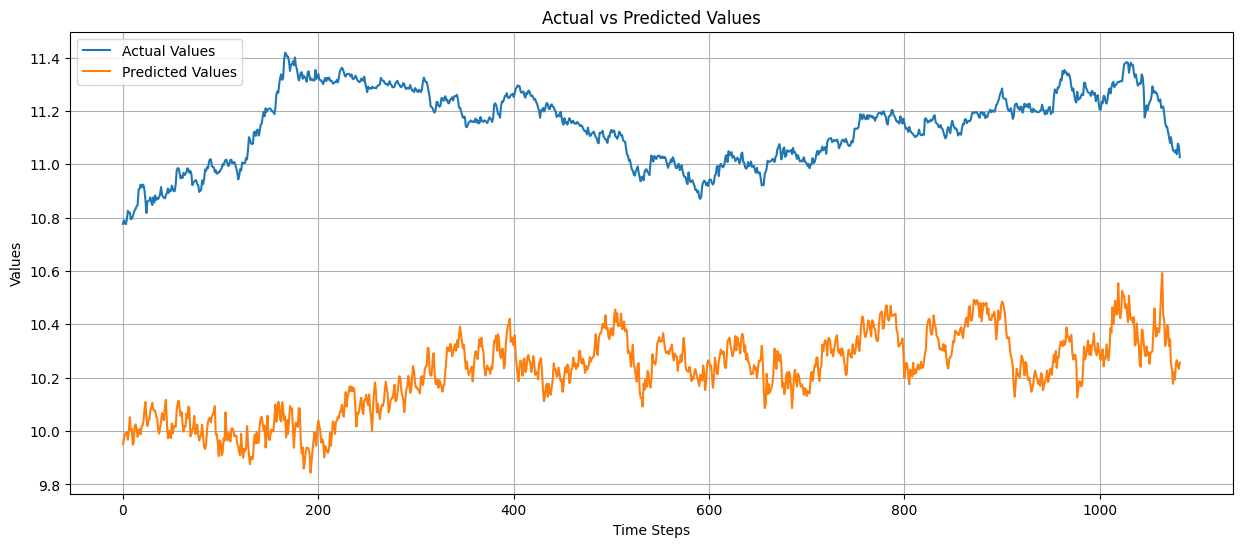

In [122]:
X_test, y_test = create_sequences(selected_x_test_int_4, selected_y_test_int_4, wandb.config.time_steps)

y_pred = model_int_hyper34.predict(X_test)
y_pred = y_scaler_selected_int_df_4.inverse_transform(y_pred)
y_test = y_scaler_selected_int_df_4.inverse_transform(y_test)

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Actual Values')#, linestyle='-')#, marker='o', alpha=0.7)
plt.plot(y_pred, label='Predicted Values')#, linestyle='--')#, marker='x', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()